In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
import matplotlib.cm as cm
%matplotlib inline

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [3]:
import xgboost as xgb
from xgboost import XGBClassifier

In [4]:
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

## wczytanie danych

In [5]:
dog_move_data = pd.read_csv(r"C:\Users\Mateusz\Desktop\pieski\DogMoveData.csv")

In [6]:
data = dog_move_data[['TestNum', 'DogID', 'Behavior_1', 'ABack_x', 'ABack_y', 'ABack_z', 'GBack_x', 'GBack_y', 'GBack_z']]
data.columns = ['TestNum', 'DogID', 'activity', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']
data.head()

,TestNum,DogID,activity,Ax,Ay,Az,Gx,Gy,Gz
0,1,16,<undefined>,0.041504,0.938965,-0.015137,-17.639161,-22.766115,7.446290
1,1,16,Synchronization,0.041992,0.941895,-0.020020,-15.075685,-11.413575,4.821778
2,1,16,Synchronization,0.040527,0.939453,-0.004395,-12.207032,-0.122070,2.807617
3,1,16,Synchronization,0.021484,0.946289,0.007813,-9.460450,7.995606,1.586914
4,1,16,Synchronization,-0.000977,0.951172,0.033691,-8.361817,14.587403,-1.037598


zamieniam spacje na _ żeby móc zrobić wizualizację

In [7]:
data = data.replace('Lying chest', 'Lying_chest').replace()

biorę dane tylko z tymi aktywnościami, które chcę klasyfikować

In [8]:
options = ['Galloping', 'Lying_chest', 'Sitting', 'Sniffing', 
           'Standing', 'Trotting', 'Walking']

In [9]:
data = data[data['activity'].isin(options)]

zamieniam dane kategoryczne na numeryczne

In [10]:
label = LabelEncoder()
data['label'] = label.fit_transform(data['activity'])
data.head()

,TestNum,DogID,activity,Ax,Ay,Az,Gx,Gy,Gz,label
9081,1,16,Walking,-0.272949,0.204102,1.185547,-39.489749,62.500004,35.766604,6
9082,1,16,Walking,-0.296875,-0.004883,1.074219,-42.114260,39.794924,44.250491,6
9083,1,16,Walking,-0.248535,-0.142578,0.994141,-41.564944,12.878419,59.997562,6
9084,1,16,Walking,-0.170898,-0.216797,0.927246,-34.240725,-14.099122,75.866704,6
9085,1,16,Walking,-0.084473,-0.226563,0.871094,-23.376466,-31.494143,91.247564,6


In [11]:
data['label'].value_counts().index

Int64Index([1, 3, 6, 5, 2, 4, 0], dtype='int64')

dzielę dane na training i testing

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X = data.drop(columns = ['label', 'TestNum', 'DogID', 'activity'])
y = data['label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

([<matplotlib.patches.Wedge at 0x1d7c44795e0>,
 [Text(0.8238297762925308, 0.7289063723783726, 'Galloping'),
  Text(-0.6198607928997153, 0.9087203075895995, 'Lying_chest'),
  Text(-1.0628754124336917, -0.283365237183233, 'Sitting'),
  Text(-0.3190552176366304, -1.0527125762043705, 'Sniffing'),
  Text(0.5912928530447843, -0.9275628075435967, 'Standing'),
  Text(1.0405214301811962, -0.3568124904395558, 'Trotting'),
  Text(1.0999681901794995, -0.008365440408991643, 'Walking')],
 [Text(0.4493616961595623, 0.3975852940245668, '23.06'),
  Text(-0.3381058870362083, 0.4956656223215997, '22.94'),
  Text(-0.5797502249638318, -0.1545628566453998, '16.30'),
  Text(-0.1740301187108893, -0.5742068597478384, '16.04'),
  Text(0.32252337438806417, -0.5059433495692345, '11.39'),
  Text(0.5675571437351978, -0.19462499478521225, '10.03'),
  Text(0.5999826491888179, -0.004562967495813623, '0.24')])

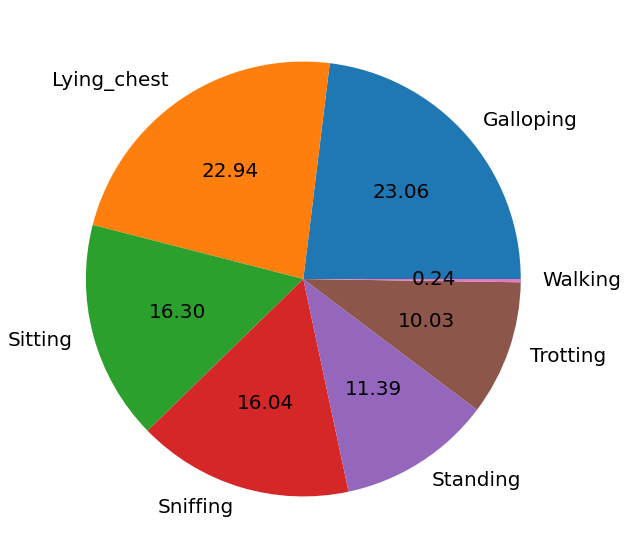

In [27]:
count_of_each_activity = np.array(y_train.value_counts())
activities = sorted(options)

plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 20})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

In [15]:
y_train.value_counts()

1    773476
3    769633
6    546697
5    538195
2    382059
4    336518
0      8121
Name: label, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [17]:
train = xgb.DMatrix(X,label=y)
test = xgb.DMatrix(X_test,label=y_test)

XGBoost

In [18]:
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [19]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [20]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.34%


In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test, y_pred, target_names = ['Galloping', 'Lying_chest', 'Sitting', 'Sniffing', 
           'Standing', 'Trotting', 'Walking']))

              precision    recall  f1-score   support

   Galloping       0.83      0.50      0.63      2707
 Lying_chest       0.86      0.88      0.87    257825
     Sitting       0.93      0.93      0.93    127353
    Sniffing       0.84      0.86      0.85    256545
    Standing       0.79      0.71      0.75    112173
    Trotting       0.92      0.90      0.91    179398
     Walking       0.77      0.80      0.78    182233

    accuracy                           0.85   1118234
   macro avg       0.85      0.80      0.82   1118234
weighted avg       0.85      0.85      0.85   1118234



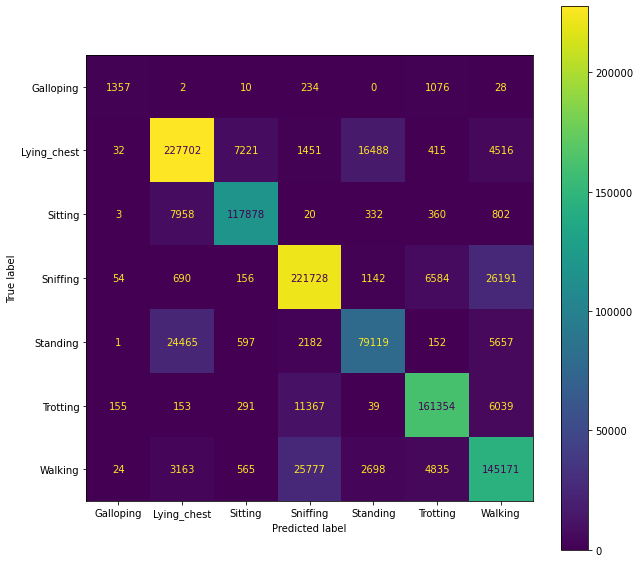

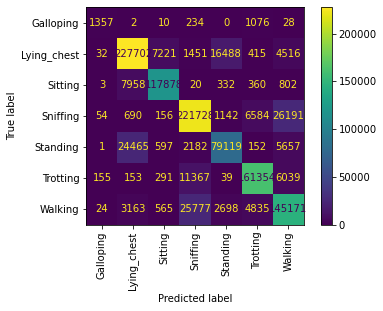

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Galloping', 'Lying_chest', 'Sitting', 'Sniffing', 
           'Standing', 'Trotting', 'Walking'], xticks_rotation='vertical').plot(ax=ax)